<div>
    <p style="float: right;"><img src="https://media.swipepages.com/2021/2/sirius-logo-principal-tag-1-300.png" height="80px"border="1px"></p>
    
</div>
<h1>Nano Desafio 5 </h1>
<h2>Pandas </h2>

Aluno: Daniel Arnóbio Dantas da Silva

Data: 07/06/2022


### Estima-se em torno de 70-80% do tempo e esforço total de um projeto de análise de dados é o pré-processamento. Uma das partes do processamento é o que chamamos de "data cleaning" que é  limpeza de dados e o processo de detecção e correção de registros corrompidos ou imprecisos. Isso é importante  para deixar os dados prontos para análises posteriores!
###### Por isso, chegou sua vez de ver um pouco como isso tudo acontece!

Você recebeu um csv chamado Churn em que você deve limpar e deixar esse dataset pronto para análises. Não se preocupe tanto em analisar o dataset agora. Seu objetivo, por hora, é encontrar possíveis erros de input, discutir com a área de negócios e tomar algumas decisões que serão comuns quando você receber um dataset:
 - Excluir ou não uma informação;
 - inputar um valor faltante;
 - substituir valores, etc

**Obs.: churn, em poucas palavras,são os casos onde um cliente ou usuário para de comprar ou usar o produto ou serviço de uma empresa.**

Importando as bibliotecas

In [4]:
import pandas as pd
import seaborn as sb
import statistics as st

Importando o dataframe

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/daniel-arnobio/churmy-dataset/main/Churn.csv', sep = ';')

Visualizando os primeiros registros

In [6]:
df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Corrigindo o nome das colunas

In [8]:
df.rename(columns = {"X0":"Id","X1":"Score","X2":"Estado","X3":"Genero","X4":"Idade","X4.1":"Patrimonio","X6":"Saldo","X7":"Produtos","X8":"TemCartCredito","X9":"Ativo","X10":"Salario","X11":"Saiu"}, inplace=True)

In [9]:
df.columns

Index(['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo',
       'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu'],
      dtype='object')

In [10]:
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [11]:
#Numero de linhas e colunas
df.shape

(999, 12)

In [12]:
#Numero de elementos no dataframe
df.size

11988

Salvando o dataframe em forma de tabela

In [13]:
df.to_csv('dados.csv') 

Explorando as variáveis categóricas

In [14]:
df_estados_id = df[["Estado"]].value_counts()
df_estados_id.head()

Estado
RS        478
SC        258
PR        257
SP          4
RP          1
dtype: int64

In [15]:
#dados incorretos "RP" e "TD"
df['Estado'].unique()

array(['RS', 'SC', 'PR', 'RP', 'SP', 'TD'], dtype=object)

In [16]:
#Substituindo RP, SP e TD pela moda (RS)
df.loc[df.Estado == "TD", 'Estado'] = "RS"
df.loc[df.Estado == "SP", 'Estado'] = "RS"
df.loc[df.Estado == "RP", 'Estado'] = "RS"
df['Estado'].value_counts()

RS    484
SC    258
PR    257
Name: Estado, dtype: int64

In [49]:
import plotly.express as px

<AxesSubplot:>

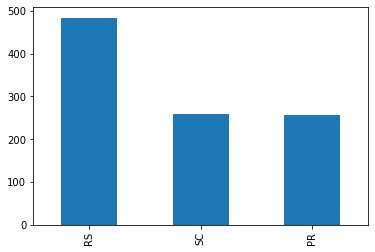

In [56]:
df['Estado'].value_counts().plot.bar()

Explorando a variável gênero

In [18]:
df['Genero'].value_counts()

Masculino    521
Feminino     461
M              6
F              2
Fem            1
Name: Genero, dtype: int64

In [19]:
df['Genero'].replace(['M'], 'Masculino', inplace = True)
df['Genero'].replace(['F', 'Fem'], 'Feminino', inplace = True)

15 - Consegue ver a mesma informação graficamente?

Masculino    527
Feminino     464
Name: Genero, dtype: int64

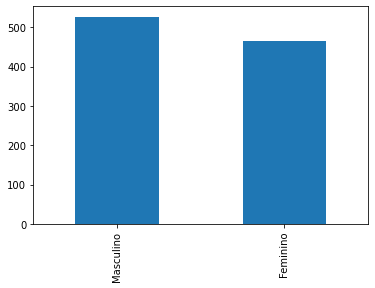

In [20]:
df_distribuicao_genero = df['Genero'].value_counts()
graf1 = df_distribuicao_genero.plot.bar()
df_distribuicao_genero

Verificando dados faltantes na coluna gênero

In [21]:
df['Genero'].isnull().sum()

8

In [22]:
#Substituir dados faltantes pela moda 
#Encontrando a moda
st.mode(df['Genero'])

'Masculino'

Substituindo os dados faltantes na coluna gênero pela moda

In [23]:
df["Genero"].fillna(st.mode(df['Genero']), inplace=True)

In [24]:
df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

Explorando as variáveis numéricas

Maximo, minimo, média etc


In [25]:
df['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

20 - Conseguiria fazer um boxplot desssa variável

<AxesSubplot:>

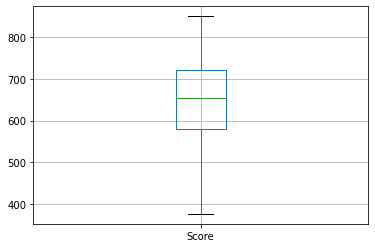

In [26]:
df.boxplot(column='Score')

Verificando a distribuição da coluna Score

array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

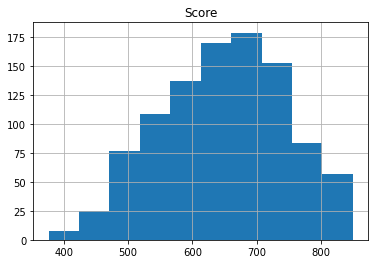

In [27]:
df.hist(column = "Score")

<AxesSubplot:xlabel='Score', ylabel='Count'>

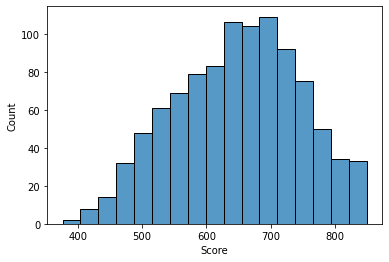

In [28]:
#Utilizado a biblioteca do Seaborn
sb.histplot(data=df['Score'])

Algumas estatísticas da variável(coluna) 'Idade':

In [29]:
df['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

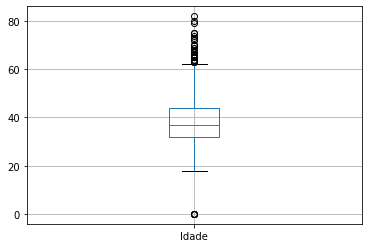

In [57]:
df.boxplot(column='Idade');

In [ ]:
#Coluna idade negativa e valor máx 140

<AxesSubplot:xlabel='Idade', ylabel='Count'>

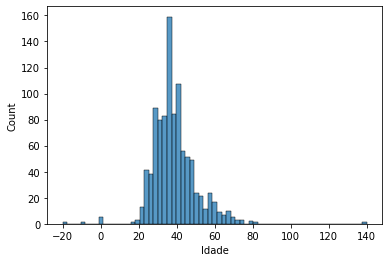

In [32]:
sb.histplot(data=df['Idade'])

Substituindo os dados destoantes pela moda da coluna


In [34]:
#Encontrando a moda
st.mode(df['Idade'])

36

In [35]:
#Substituindo  36 na coluna 'Idade'
df['Idade'].replace([-20,-10,140], 36, inplace= True)

Algumas estatísticas da variável saldo

In [36]:
df['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Boxplot da variável saldo

<AxesSubplot:>

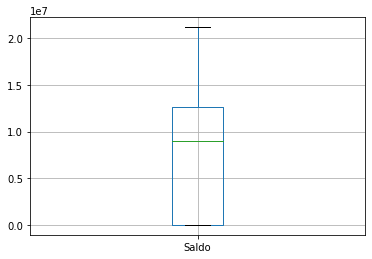

In [37]:
df.boxplot(column=['Saldo'])

Algumas estatísticas da variável salário

In [38]:
df['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Boxplot da variável salário

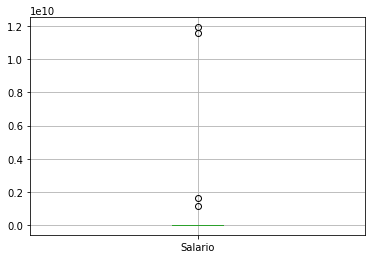

In [39]:
boxplot_salario = df.boxplot(column=['Salario'])

Histograma da variável salário

<AxesSubplot:xlabel='Salario', ylabel='Count'>

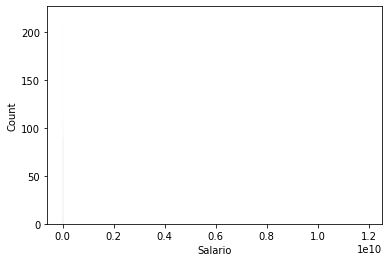

In [40]:
sb.histplot(data=df['Salario'])

Substituindo o outlier na coluna Salário pelo valor máximo

In [41]:
#Supondo que são outliers! O que é isso:
##Os outliers são dados que se diferenciam drasticamente de todos os outros.
#Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá)
#causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

In [42]:
df['Salario'].max()

11934688000.0

In [43]:
df['Salario'].min()

9677.0

In [45]:
df.loc[df.Salario > 1061159976, 'Salario'] = 1061159976

Verificando os valores nulos no dataset

In [46]:
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

Substituindo os valores nulos pela mediana

In [58]:
#Substituir os salarios nulos para o valor máximo
df["Salario"].fillna(df["Salario"].median(), inplace=True)

35 -Parabéns por ter chegado até aqui!!

In [48]:
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64